In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import visfunctions as sp
import utilfunctions as sf
import pickle
from collections import Counter
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [80]:
def visualize_attention(CC_data, plotN=5, plottype=2, SIGMA=50):
    # plottype:
    # 1 for gaze locations only
    # 2 for heatmap overlay
    # 3 for regular spotlight
    # 4 for spotlight with level sets
    # SIGMA is used for converting locations into maps (distributions)
    # plotN is how many images to plot

    imnames = list(CC_data.keys())
    
    if plotN:
        imnames = imnames[:plotN] 

    for filename in imnames:

        code_heatmap,im = sf.get_heatmap_for_image(filename,CC_data[filename],imdir,sigma=SIGMA,toplot=False)

        fig, ax = plt.subplots(1, 1, figsize=(8,8))

        if plottype==1:
            ax.imshow(im)
            xs = [elem['coords'][0] for elem in CC_data[imnames[i]]]
            ys = [elem['coords'][1] for elem in CC_data[imnames[i]]]
            ax.scatter(x=xs, y=ys, c='r', s=10)
        elif plottype==2:
            sp.transparent_heatmap(ax,im,code_heatmap)
        elif plottype==3:
            spotlight_res = sp.spotlight(im,code_heatmap);
            ax.imshow(spotlight_res); 
        elif plottype==4:
            spotlight_res = sp.spotlight_custom(im,code_heatmap,toplot=False,percentile_based=False,\
                                                levels=5,most_salient_nlevel=3,smoothness=0)
            ax.imshow(spotlight_res); 

        ax.set_axis_off(); ax.set_title(filename);

        plt.show();
        
def visualize_attention_bytime(CC_data, times, plotN=5, plottype=2, SIGMA=50):
    # plottype:
    # 1 for gaze locations only
    # 2 for heatmap overlay
    # 3 for regular spotlight
    # 4 for spotlight with level sets
    # SIGMA is used for converting locations into maps (distributions)
    # plotN is how many images to plot

    imnames = list(CC_data.keys())
    ntimes = len(times)
    
    if plotN:
        imnames = imnames[:plotN] 

    for filename in imnames:
        
        fig, ax = plt.subplots(1, len(times), figsize=(20,20))
        
        for t in range(ntimes):

            CC_by_time = [CC_data[filename][ii] for ii in range(len(CC_data[filename])) \
                         if CC_data[filename][ii]['time']==times[t]]

            code_heatmap,im = sf.get_heatmap_for_image(filename,CC_by_time,imdir,sigma=SIGMA,toplot=False)

            if plottype==1:
                ax[t].imshow(im)
                xs = [elem['coords'][0] for elem in CC_data[imnames[i]]]
                ys = [elem['coords'][1] for elem in CC_data[imnames[i]]]
                ax[t].scatter(x=xs, y=ys, c='r', s=10)
            elif plottype==2:
                sp.transparent_heatmap(ax[t],im,code_heatmap)
            elif plottype==3:
                spotlight_res = sp.spotlight(im,code_heatmap);
                ax[t].imshow(spotlight_res); 
            elif plottype==4:
                spotlight_res = sp.spotlight_custom(im,code_heatmap,toplot=False,percentile_based=False,\
                                                    levels=5,most_salient_nlevel=3,smoothness=0)
                ax[t].imshow(spotlight_res); 

            ax[t].set_axis_off(); ax[t].set_title('%s (time=%d)'%(filename,times[t]));

        plt.show();
        
        
def print_number_viewers(CC_data):
    print('Avg. # viewers/image: %2.1f'%(np.mean([len(CC_data[filename]) for filename in CC_data])))

    imnames = list(CC_data.keys())
    res = None
    for imname in imnames:
        curtimes = Counter([uelem['time'] for uelem in CC_data[imname]])
        if res is None:
            res = curtimes
        else:
            res += curtimes

    alltimes = list(res.keys())
    alltimes.sort()

    for time in alltimes:
        print('%2.1f viewers per image (on average) at viewing duration of %d ms'%(res[time]/float(len(imnames)),time))


# CAT2000: natural images #
* Source: http://saliency.mit.edu/datasets.html
* This data was collected at a single viewing duration of 2000 ms per image.

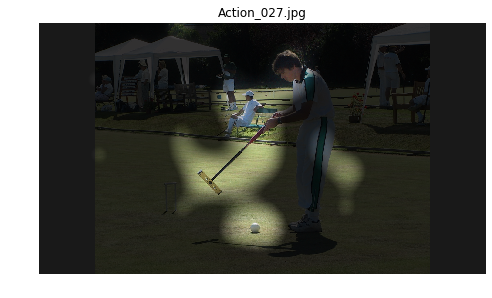

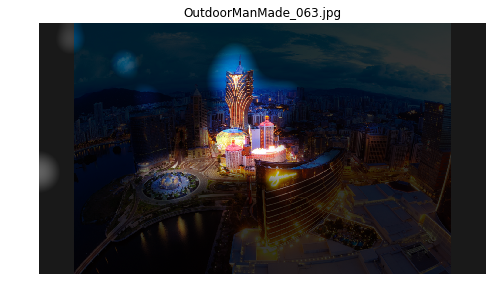

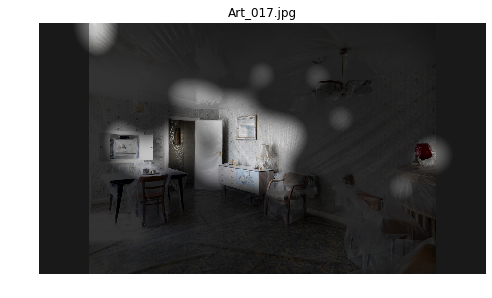

In [78]:
imdir = '../../attention-methodologies/data/CodeCharts/CAT2000_images' # CHANGE THIS 
# by downloading the images from here: http://attent-methods.scripts.mit.edu/datasets/CAT2000_images.zip
with open('CodeCharts_CAT2000.pickle', 'rb') as curfile:  
    CC_data = pickle.load(curfile)
    
visualize_attention(CC_data, plotN=3, plottype=3)

In [81]:
print_number_viewers(CC_data)

Avg. # viewers/image: 44.9
44.9 viewers per image (on average) at viewing duration of 2000 ms


# OSIE: natural images #
* Source: https://github.com/NUS-VIP/predicting-human-gaze-beyond-pixels
* This data was collected at the following viewing durations (in milliseconds): 500, 1000, 2000, 3000, 4000, 5000

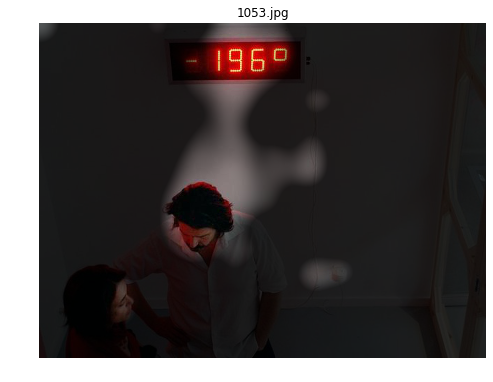

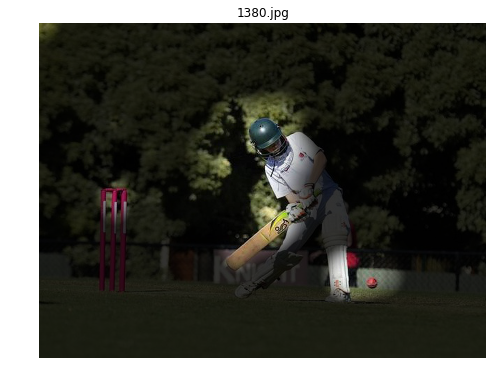

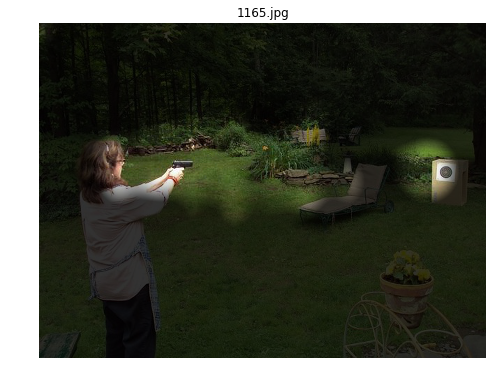

In [82]:
imdir = '../../attention-methodologies/data/CodeCharts/OSIE_images' # CHANGE THIS 
# by downloading the images from here: http://attent-methods.scripts.mit.edu/datasets/OSIE_images.zip
with open('CodeCharts_OSIE.pickle', 'rb') as curfile:  
    CC_data = pickle.load(curfile)
    
visualize_attention(CC_data, plotN=3, plottype=3)

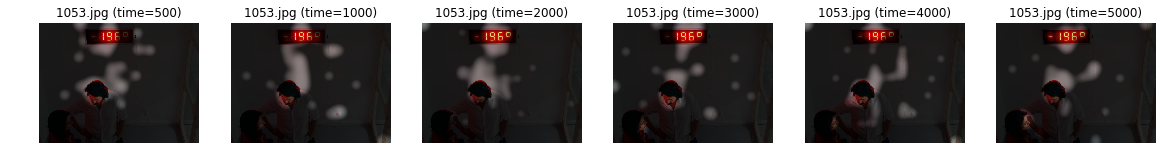

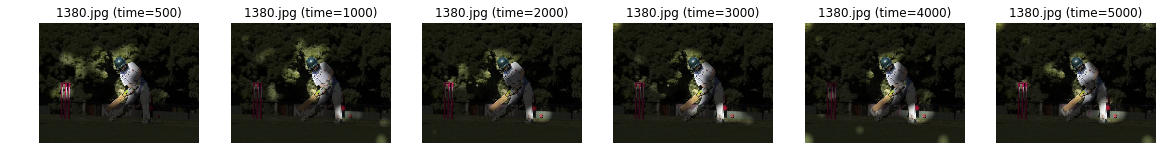

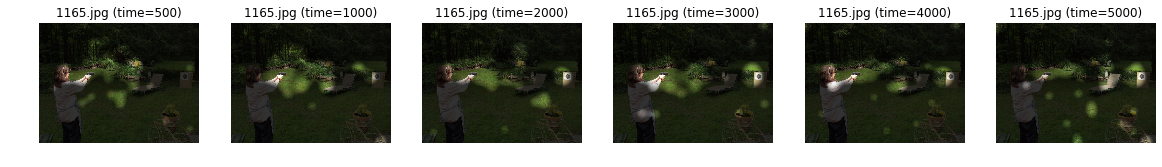

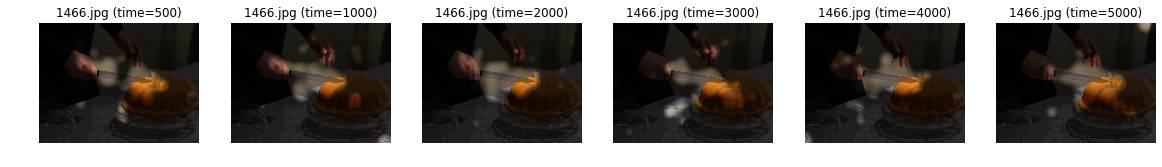

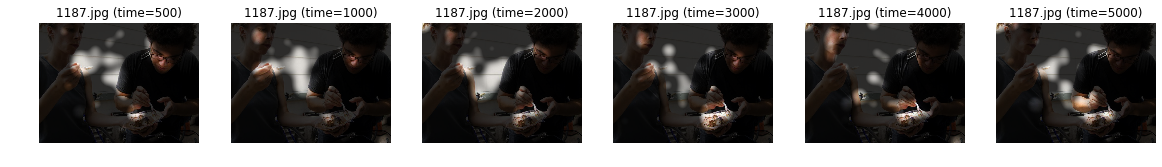

In [64]:
# split attention data by viewing duration: 
imnames = list(CC_data.keys())
res = [uelem['time'] for key in CC_data for uelem in CC_data[key]]
alltimes = list(Counter(res).keys())
alltimes.sort()

visualize_attention_bytime(CC_data, alltimes, plotN=5, plottype=3, SIGMA=50)

In [83]:
print_number_viewers(CC_data)

Avg. # viewers/image: 281.8
44.9 viewers per image (on average) at viewing duration of 500 ms
44.7 viewers per image (on average) at viewing duration of 1000 ms
52.8 viewers per image (on average) at viewing duration of 2000 ms
46.4 viewers per image (on average) at viewing duration of 3000 ms
48.2 viewers per image (on average) at viewing duration of 4000 ms
44.9 viewers per image (on average) at viewing duration of 5000 ms


# Resumes #
* Source: https://www.canva.com/
* You can obtain the original images from https://www.canva.com/design?create=true&media=<ID\> where <ID\> is the 11 characters before `.png` from the filenames. For instance, given a heatmap named `CV_6_10_MACKlzfu2Hc.png`, the <ID\> for the original file is `MACKlzfu2Hc`.
* This data was collected at the following viewing durations (in milliseconds): 500, 1000, 2000, 6000

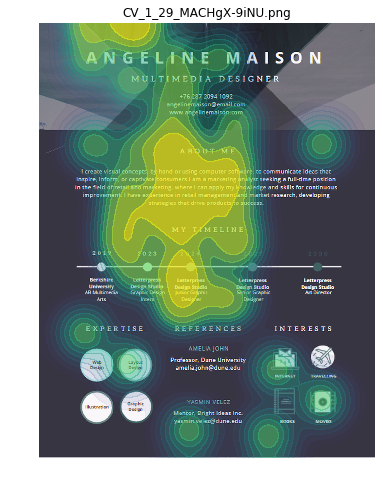

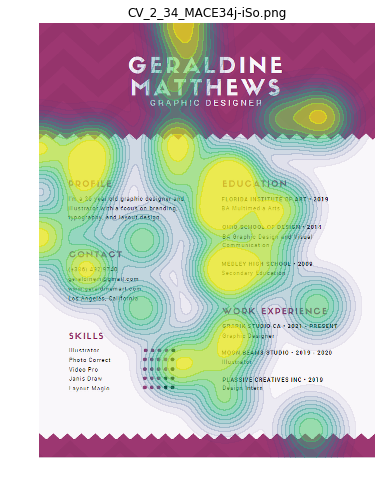

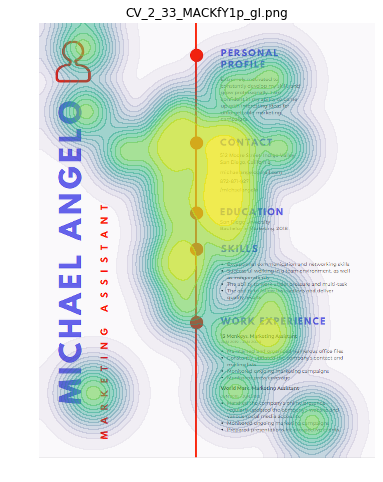

In [84]:
imdir = '../../attention-methodologies/data/CodeCharts/resume_images' # CHANGE THIS 
# by downloading the images from the Canva URLs provided
with open('CodeCharts_resumes.pickle', 'rb') as curfile:  
    CC_data = pickle.load(curfile)
    
visualize_attention(CC_data, plotN=3, plottype=2)

In [85]:
print_number_viewers(CC_data)
# attention data can be plotted across different viewing durations but this is not enough participants/duration 
# to make strong conclusions

Avg. # viewers/image: 34.9
8.9 viewers per image (on average) at viewing duration of 500 ms
8.7 viewers per image (on average) at viewing duration of 1000 ms
8.8 viewers per image (on average) at viewing duration of 2000 ms
8.5 viewers per image (on average) at viewing duration of 6000 ms


# Graphic designs #
* Source: https://www.canva.com/
* You can obtain the original images from https://www.canva.com/design?create=true&media=<ID\> where <ID\> is the 11 characters before `.png` from the filenames. For instance, given a heatmap named `posters_10_24_MACVRicsIu0.png`, the <ID\> for the original file is `MACVRicsIu0`.
* This data was collected at the following viewing durations (in milliseconds): 500, 1000, 2000, 4000

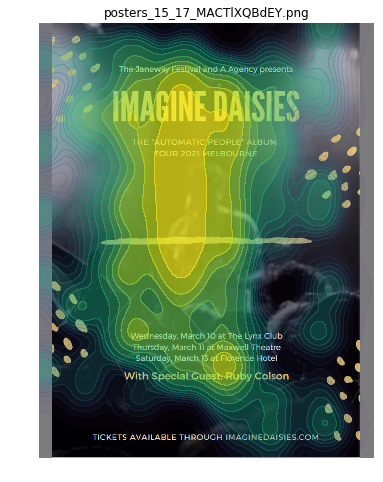

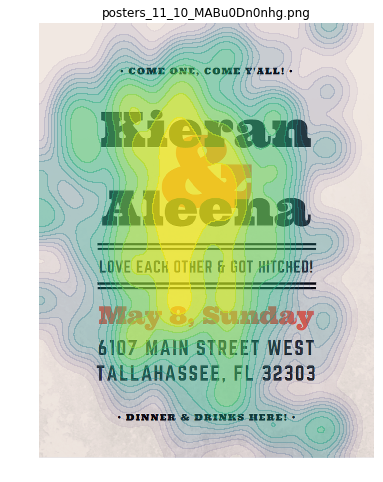

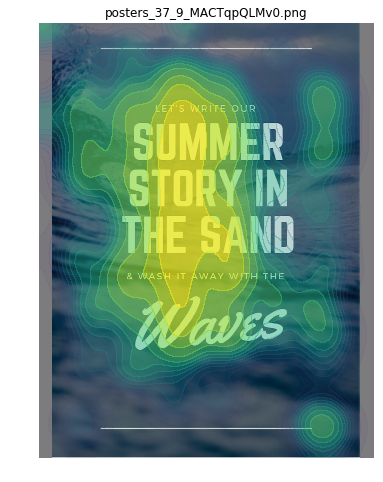

In [86]:
imdir = '../../attention-methodologies/data/CodeCharts/graphicdesigns' # CHANGE THIS 
# by downloading the images from the Canva URLs provided
with open('CodeCharts_graphicdesigns.pickle', 'rb') as curfile:  
    CC_data = pickle.load(curfile)
    
visualize_attention(CC_data, plotN=3, plottype=2)

In [87]:
print_number_viewers(CC_data)

Avg. # viewers/image: 392.7
98.2 viewers per image (on average) at viewing duration of 500 ms
81.2 viewers per image (on average) at viewing duration of 1000 ms
115.2 viewers per image (on average) at viewing duration of 2000 ms
98.2 viewers per image (on average) at viewing duration of 4000 ms
